In [1]:
import torch
import torchvision
import os
import numpy as np
import pandas as pd
import torch
from scipy.io import loadmat
import torch.utils.data as data_utl
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torch.optim as optim
from torchvision import transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import torch.utils.data as data_utl
import cv2
from PIL import Image
from google.colab import files
# uploaded = files.upload()
# from google.colab import drive
#drive.mount('/content/drive')

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

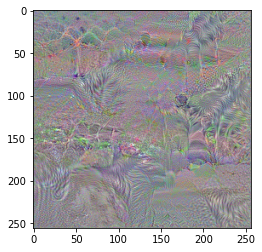

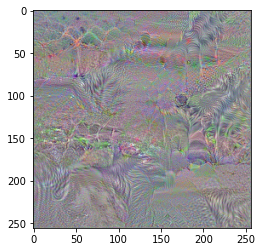

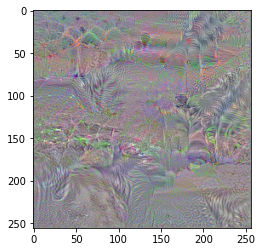

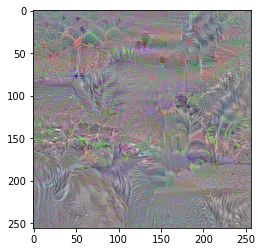

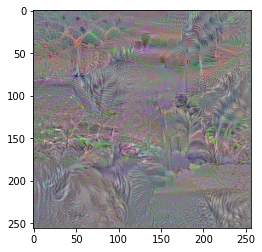

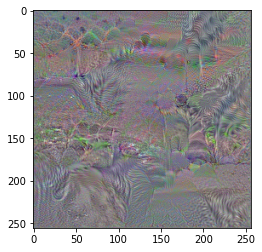

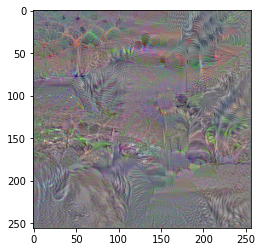

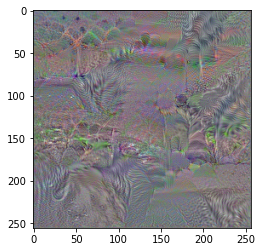

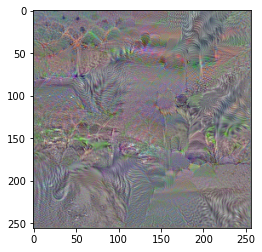

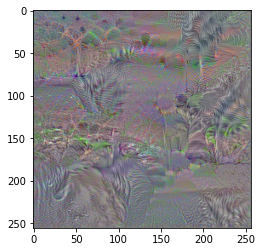

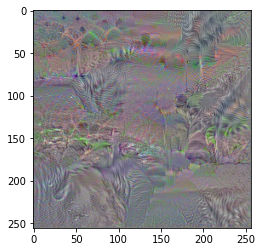

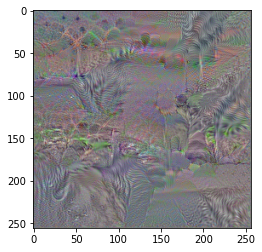

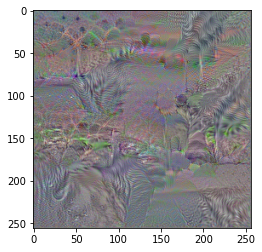

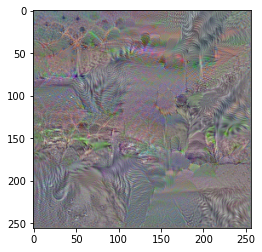

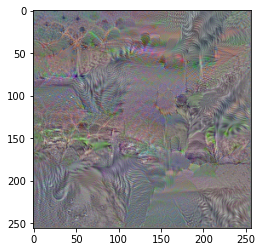

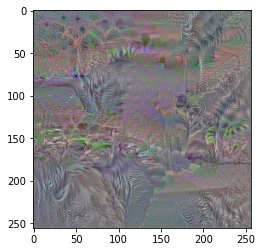

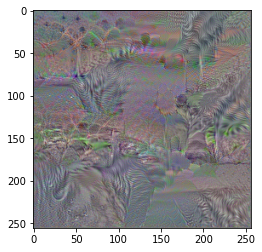

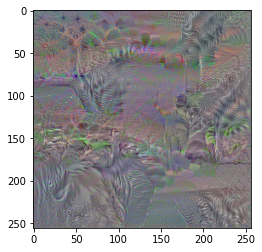

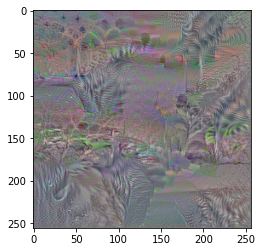

In [5]:

# net = models.resnet50(pretrained=True)
net = models.resnet101(pretrained=True)
net.cuda()
lr = 0.01


input = torch.nn.parameter.Parameter(torch.empty(1,3,256,256).uniform_(0,1))

img_transform = transforms.Compose([transforms.ToTensor(), 
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

target_class = 340 #zebra , 235:dog

criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.Adam(params=[input], lr=lr)
net.eval()
#lr_sched = optim.lr_scheduler.MultiStepLR(optimizer, [500,1000,1500,2000],gamma=0.5)
optimizer.zero_grad()
for step in range (5000):
    i=np.random.randint(256-224)
    j=np.random.randint(256-224)
    X = input[:,:,i:i+224,j:j+224]
    #X = X * np.random.uniform(low=0.8, high=1.2)
    logits = net(X.float().cuda())
    #loss=criterion(logits,target)
    loss = -logits[0][target_class]
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    #print('step {} - loss is : {}'.format(step,loss.item()))
    #lr_sched.step()
    if step % 200 == 0 and step>1000 :
      a = input.detach().numpy().squeeze().transpose([1,2,0])
      b = a - np.min(a)
      b = 255 * b / np.max(b)
      #temp_img = b.astype(np.uint8)
      #Image.fromarray(temp_img).save("contentdi/zebra_"+ str(step)+'.jpg')
      plt.figure()
      plt.imshow(b.astype(np.uint8))

In [4]:
a = input.detach().numpy().squeeze().transpose([1,2,0])
b = a - np.min(a)
b = 255 * b / np.max(b)

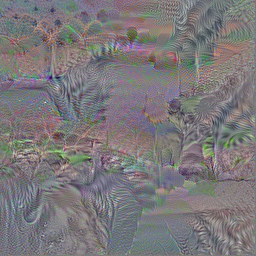

In [6]:
from PIL import Image
Image.fromarray(b.astype(np.uint8))